In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# IMPORTING DATA

In [99]:
df=pd.read_csv("Datasets/Loan Prediction Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [100]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# DATA CLEANING

In [102]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [103]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [104]:
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [105]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

In [106]:
import seaborn as sns

In [107]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


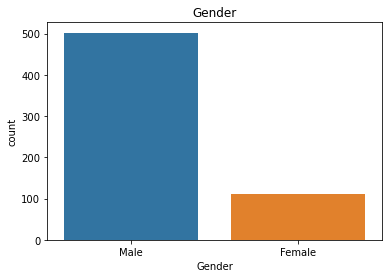

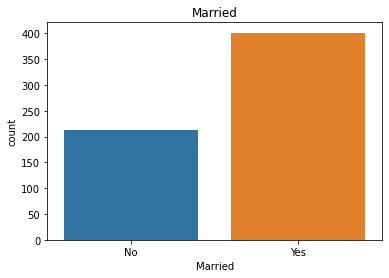

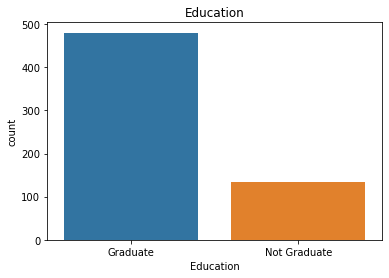

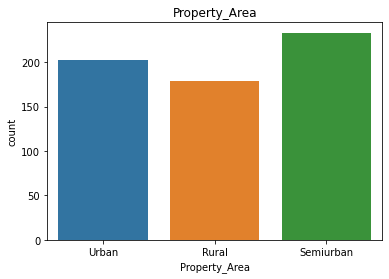

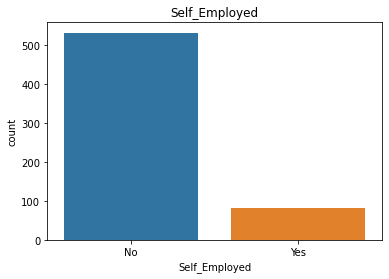

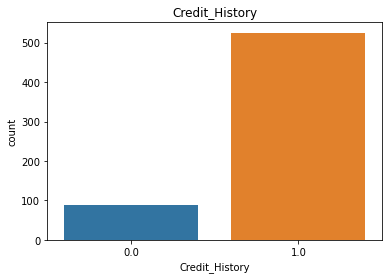

In [108]:
cols=["Gender","Married","Education","Property_Area","Self_Employed","Credit_History"]
for column in cols:
    sns.countplot(column,data=df)
    plt.title(column)
    plt.show()

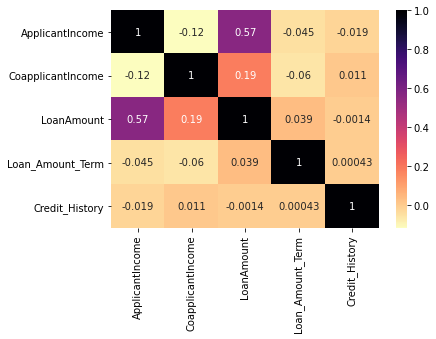

In [109]:
x=df.corr()
sns.heatmap(x,annot=True,cmap="magma_r");

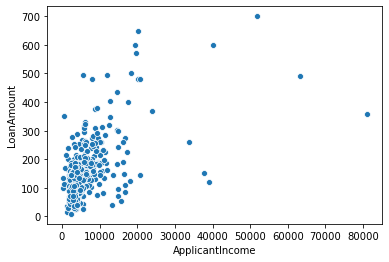

In [110]:
sns.scatterplot(x="ApplicantIncome",
                y="LoanAmount",data=df);

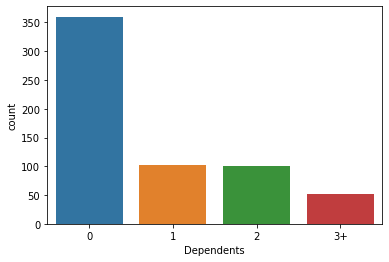

In [111]:
sns.countplot(df["Dependents"]);

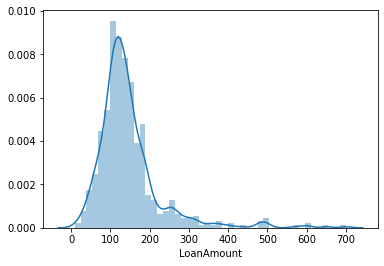

In [112]:
sns.distplot(df["LoanAmount"]);

In [113]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


# LABEL ENCODING

In [128]:
df1=df.drop(columns=["Loan_ID"],axis=1)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [129]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df1[col] = le.fit_transform(df1[col])

In [130]:
df1.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0


# MODEL BUILDING

In [133]:
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
scaler.fit(df1)
scaler.transform(df1)
X=df1.drop("Loan_Status",axis=1).values
y=df1["Loan_Status"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=1)

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

logreg=LogisticRegression(random_state=1)
dc=DecisionTreeClassifier(random_state=1)
rf=RandomForestClassifier(max_depth=4)
etc=ExtraTreesClassifier()

classifiers=[("ExtraTreesClassifier",etc),
            ("Decision tree",dc),
            ("Random Forest",rf)]

for clfname,clf in classifiers:
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    
    print(clfname,"gives",accuracy_score(y_test,y_pred),"accuracy")    
    
    
    

ExtraTreesClassifier gives 0.7487684729064039 accuracy
Decision tree gives 0.6847290640394089 accuracy
Random Forest gives 0.7684729064039408 accuracy


# HYPERPARAMETER TUNING


In [138]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [142]:
rf2=RandomForestClassifier(random_state=1)
params={"n_estimators":[300,400,500],
        "max_depth":[5,4,6],
        "min_samples_leaf":[0.1,0.2,0.4]}
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(estimator=rf2,
                   param_grid=params,
                   cv=4)
grid.fit(X_train,y_train)
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 0.1, 'n_estimators': 300}

In [143]:
best_model=grid.best_estimator_
y_prediction=best_model.predict(X_test)
print("This modeel gives",accuracy_score(y_test,y_pred),"accuracy")

This modeel gives 0.7684729064039408 accuracy
